In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
import torch
torch.cuda.set_device(1)

In [3]:
# Register the datasets - both train and test sets

from detectron2.data.datasets import register_coco_instances


#for d in ["train", "test"]:
register_coco_instances(f"paprika_segs_detectron2", {}, f"paprika_coco/paprika_train.json", f"paprika_coco")
register_coco_instances(f"paprika_test_segs_detectron2", {}, f"paprika_test_coco/paprika_testset_train.json", f"paprika_test_coco")

[11/13 10:11:01 d2.data.datasets.coco]: Loaded 75 images in COCO format from paprika_coco/paprika_train.json


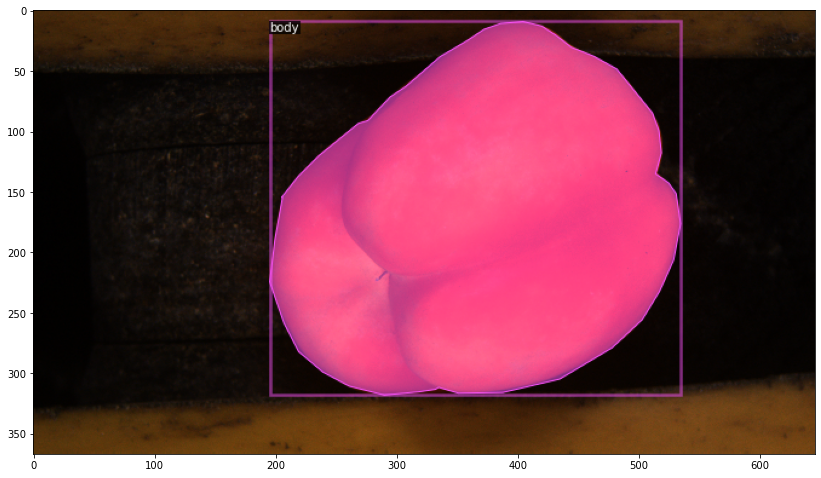

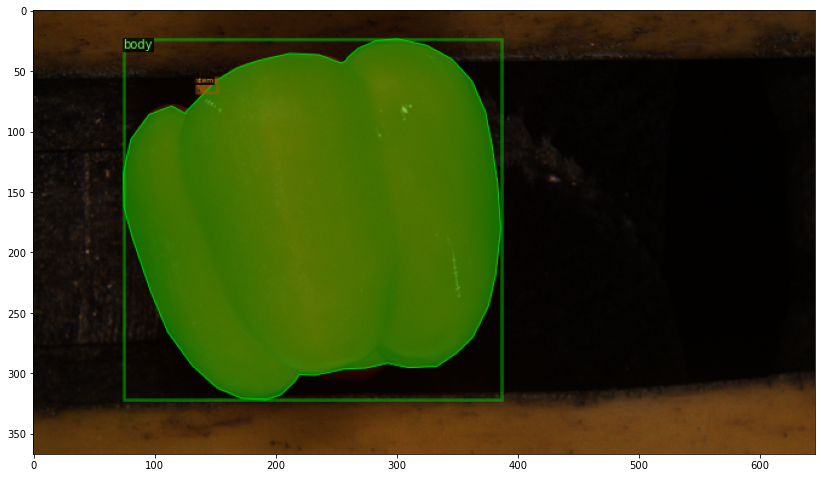

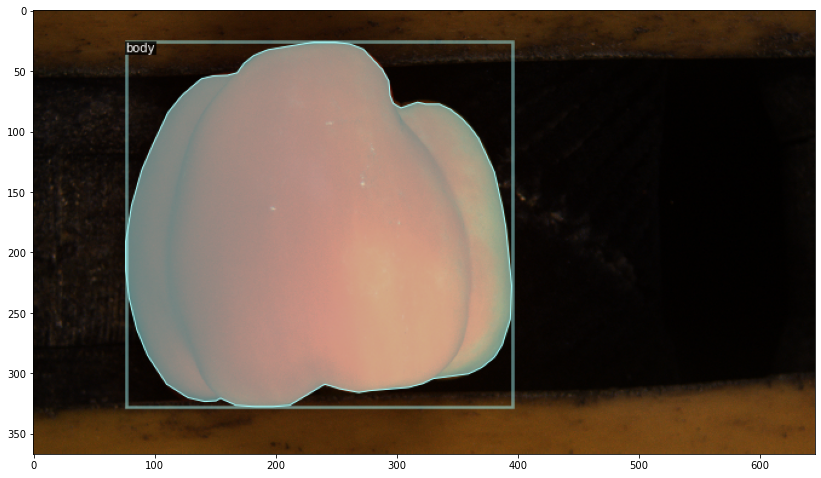

In [4]:
import random
from detectron2.data import DatasetCatalog, MetadataCatalog

dataset_dicts = DatasetCatalog.get("paprika_segs_detectron2")
microcontroller_metadata = MetadataCatalog.get("paprika_segs_detectron2")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [5]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("paprika_segs_detectron2",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 500
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()


[11/13 10:11:15 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[11/13 10:11:15 d2.data.datasets.coco]: Loaded 75 images in COCO format from paprika_coco/paprika_train.json
[11/13 10:11:15 d2.data.build]: Removed 0 images with no usable annotations. 75 images left.
[11/13 10:11:15 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    body    | 75           |    stem    | 62           |
|            |              |            |              |
|   total    | 137          |            |              |
[11/13 10:11:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[11/13 10:11:15 d2.data.build]: Using training sampler TrainingSampler
[11/13 10:11:15 d2.data.common]: Serializing 75 elements to byte tensors and concatenating them all ...
[11/13 10:11:15 d2.data.common]: Serial

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (2, 256, 1, 1) in

[11/13 10:11:15 d2.engine.train_loop]: Starting training from iteration 0


/home/rajat/anaconda3/envs/torchenv/lib/python3.7/site-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/rajat/anaconda3/envs/torchenv/lib/python3.7/site-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/home/rajat/anaconda3/envs/torchenv/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:217: UserWarning: This overload of nonzero is

[11/13 10:11:32 d2.utils.events]:  eta: 0:06:41  iter: 19  total_loss: 2.123  loss_cls: 1.193  loss_box_reg: 0.2074  loss_mask: 0.6943  loss_rpn_cls: 0.0162  loss_rpn_loc: 0.008711  time: 0.8346  data_time: 0.1610  lr: 4.9953e-06  max_mem: 9093M
[11/13 10:11:49 d2.utils.events]:  eta: 0:06:24  iter: 39  total_loss: 1.91  loss_cls: 0.984  loss_box_reg: 0.2069  loss_mask: 0.6827  loss_rpn_cls: 0.01237  loss_rpn_loc: 0.007252  time: 0.8360  data_time: 0.1575  lr: 9.9902e-06  max_mem: 9093M
[11/13 10:12:06 d2.utils.events]:  eta: 0:06:09  iter: 59  total_loss: 1.537  loss_cls: 0.6514  loss_box_reg: 0.2092  loss_mask: 0.6577  loss_rpn_cls: 0.01404  loss_rpn_loc: 0.007158  time: 0.8382  data_time: 0.1592  lr: 1.4985e-05  max_mem: 9093M
[11/13 10:12:23 d2.utils.events]:  eta: 0:05:53  iter: 79  total_loss: 1.27  loss_cls: 0.4033  loss_box_reg: 0.2111  loss_mask: 0.627  loss_rpn_cls: 0.01525  loss_rpn_loc: 0.007207  time: 0.8409  data_time: 0.1521  lr: 1.998e-05  max_mem: 9093M
[11/13 10:12:40

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9 
cfg.DATASETS.TEST = ("paprika_test_segs_detectron2", )
predictor = DefaultPredictor(cfg)

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("paprika_test_segs_detectron2")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=microcontroller_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
m = torch.load('./output/model_final.pth')

In [ ]:
for name in m['model'].keys():
    if m['model'][name].requires_grad:
        print(name)

In [ ]:
m['model']['backbone.fpn_lateral2.weight'].requires_grad

In [ ]:
from detectron2.modeling import build_model
model = build_model(cfg)  # returns a torch.nn.Module

In [ ]:
for k,v in model.named_parameters():
    if v.requires_grad:
        print(k)